<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/CFD_TC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             N            dX     T_est          erro
0          1.0  1.000000e+00 -0.098938  1.288044e+00
1         10.0  1.000000e-01  0.252166  2.658538e-01
2        100.0  1.000000e-02  0.333574  2.884815e-02
3       1000.0  1.000000e-03  0.342483  2.908690e-03
4      10000.0  1.000000e-04  0.343382  2.911091e-04
5     100000.0  1.000000e-05  0.343472  2.911331e-05
6    1000000.0  1.000000e-06  0.343481  2.911355e-06
7   10000000.0  1.000000e-07  0.343482  2.911358e-07
8  100000000.0  1.000000e-08  0.343482  2.911363e-08


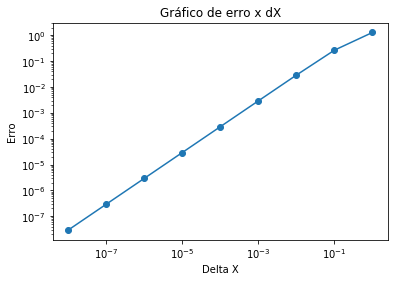

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# definição do numero de linhas na tabela
potencia = 8

# definição do numero de pontos por potência de n
n = []
power = np.arange(0, potencia+1)
for i in power:
  n.append(10**i)

# definição de L
L = 1

# criação da estrutura da tabela com 4 colunas preenchidas inicialmente zeros com excessão da primeria
tabela = pd.DataFrame({'N': n,
                       'dX': np.zeros(len(n)),
                       'T_est': np.zeros(len(n)),
                       'erro': np.zeros(len(n))})

# definindo e
e = np.exp(1)

# definindo a variável N como float
tabela['N'] = tabela['N'].astype('float')

# definição dos tamanhos de dX por potência de n
for i in range(len(tabela['N'])):
  tabela['dX'][i] = L / tabela['N'][i]

# loop pela potência de 10 no número de pontos
for i in range(tabela['N'].shape[0]):
  soma = 0
  
#loop para cada obtenção vo valor da temperatura em cada ponto
  for p in range(10 ** i):
    xp = (p - 0.5) * (L/(10**i))
    Tp = ((e ** (2 * xp)) - 1) / (e ** 2 - 1)
    soma += Tp 
  
# incremento do somatório pra obtenção conjunto de n pontos  
  T_media = L/(10 ** i) * soma
  tabela['T_est'][i] = T_media
  tabela['erro'][i] = (0.3434823572503340 - T_media)/0.3434823572503340

print(tabela)

# plotando o gráfico de dX x erro
plt.plot(tabela['dX'], tabela['erro'], '-o')
plt.title('Gráfico de erro x dX')
plt.ylabel('Erro')
plt.yscale('log')
plt.xlabel('Delta X')
plt.xscale('log')
plt.show()